# 1.1 生日问题

## 1.1.1 陈述问题

**（1）房间里有多少人才能保证其中至少两个人的生日在同一天的概率不小于50%？**

A和B的生日有某种关系吗？知道A的生日是否能推断出B的生日落在某一区域的概率。我们参加的是一场家庭聚会吗？

**（2）假设客人的出生日期都是相互独立的，那么，房间里有多少人才能保证其中至少两个人的生日在同一天的概率不小于50%？**

一年中任何一天都有相同的概率成为每个人的生日吗？对于加拿大职业曲棍球球员聚会，我们没法给出“每个人在一年中任何一天出生的概率是相等”的假设。

**（3）假设客人的出生日期都是互相独立的，并且每个人都等可能地出生在一年中的任何一天（2月29日除外），那么房间里有多少人才能保证其中至少两个人的生日在同一天的概率不小于50%？**

### 1.1.2 解决问题

- 每个人的生日都不相同的情况下的第366人。狄利克雷鸽巢。2-365。
- 183人生日互不相同的情况下的第184人。
- n个人，生日的所有排布可能，至少两个人生日相同的所有排布可能。n增大，穷举越来越难:( 
- n个人，所有人生日互不相同的概率。

我们得到了表达式，确定了边界情况，改写了原表达式使分子更简单。现在交给计算机告诉我们乘积首次小于1/2时，n是多少。

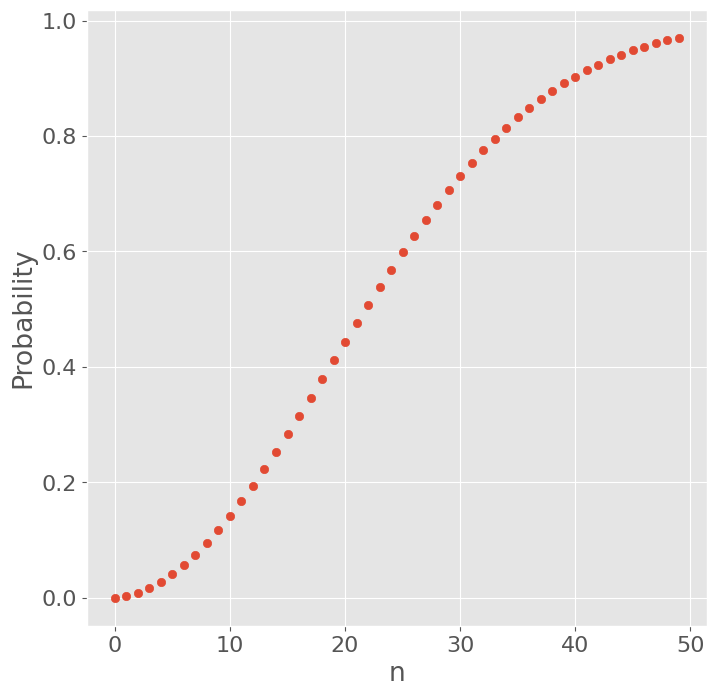

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

def plot_prob(n, year):
    noshare = [1]
    share = [0]
    currentnoshare = 1
    for i in range(2, n + 1):
        newfactor = (year - (i - 1))/365
        currentnoshare = currentnoshare * newfactor
        noshare.append(currentnoshare)
        share.append(1.0 - currentnoshare)
    xs = range(n)
    ys = share

    plt.figure(figsize=(8, 8))
    plt.scatter(xs, ys)
    plt.xlabel('n')
    plt.ylabel('Probability')

plot_prob(50, 365)

## 1.1.3 推广：效率

**一个随机试验共有D种可能的结果，并且每种结果出现的概率是相等的，那么需要进行多少次试验才能使“至少两次试验的结果相同”的概率为50%？** 拆盲盒，下酸雨，计算hash。

我们希望得到一个高效且便于使用的算法，最好能得到一个不错的闭型解，这样就能看出答案是如何随着参数的改变而发生变化的。（想要的真多）

logx。只要看到乘积，你就要**取其对数**，并形成一种**巴甫洛夫条件反射**（hhhhh）。关于和与积分之间的相互转化，我们有一套庞大的理论。你可能还记得像黎曼和、黎曼积分这样的名词。但要注意，在乘积里并没有类似的概念。我们所熟知的只有和。虽然我们对于乘积了解得并不多，但会看到对数可以把乘积转化成和，这样就能进入熟悉的领域。

之前我们得到公式$p_n = 1*···*(1-k/365), k=(0,···,n)$。其中n是参与聚会的人数，365是一年的天数。

$logp_n = log1 + ··· + log(1-k/365), k=(0,···,n)$

我们假定n远小于365 (见1.1.2), $log(1-k/365) ≈ -k/365$。(泰勒展开，切线逼近)

$logp_n ≈ -(n-1)n/365·2$

令$p_n = 1/2$, $(n-1)n ≈ 365·2log2$

$(n-1)n ≈ n^2$, $n^2 ≈ 365·2log2$

如果一年有D天，那么答案就是D·2log2开根号。

$(n-1)n ≈ (n-1/2)^2$, $(n-1/2)^2 ≈ 365·2log2$

在生日问题中，我们得到所需的总人数约为22.9944，它与23的差距极小。这相当神奇：通过几次简单的近似计算，我们得到了与23非常接近的结果，只不过多做了一点工作，误差就下降到仅为0.0056！我们完全回避了大量的乘积计算。

## 1.1.4 数值检验


In [22]:
import random
from math import sqrt, log

def birthday(num, days):
    """Takes in two arguments: the number of times we act, the total number
    of days in a year. Return the probability of "same birthday" of the number
    of people.
    """
    numspeople = [0 for k in range(0, days)]
    # start experiment
    for n in range(0, num):
        share = 0
        bdaylist = []; # birthday for everyone in room
        k = 0; # we have zero person. It's an empty room
        while share == 0:
            x = random.choice(range(0, days))
            if x in bdaylist:
                share = 1      
            else:
                bdaylist.append(x)
            k = k + 1
        # if there is only one same birthday, then from this person, 
        # all numspeople will add 1
        if share == 1:
            # we assume k is always less than days for it's impossible bigger.
            for d in range(k, days):
                numspeople[d] += 1
    
    # calculate probability
    # People
    max = int(3 * (0.5 + sqrt(days * log(4))))
    # Probability
    share_prob = []
    # max is always less than. days
    for d in range(max):
        share_prob.append(numspeople[d] * 1.0 / num)

    return share_prob

In [23]:
def theory(days, max_num_people):
    """"""
    share_prob = []
    for k in range(max_num_people):
        # Product 1*···*(1-k/365),k=(0,···,n) 
        p = 1
        for i in range(k + 1):
            p *= 1 - i / days
        share_prob.append(1 - p)

    return share_prob

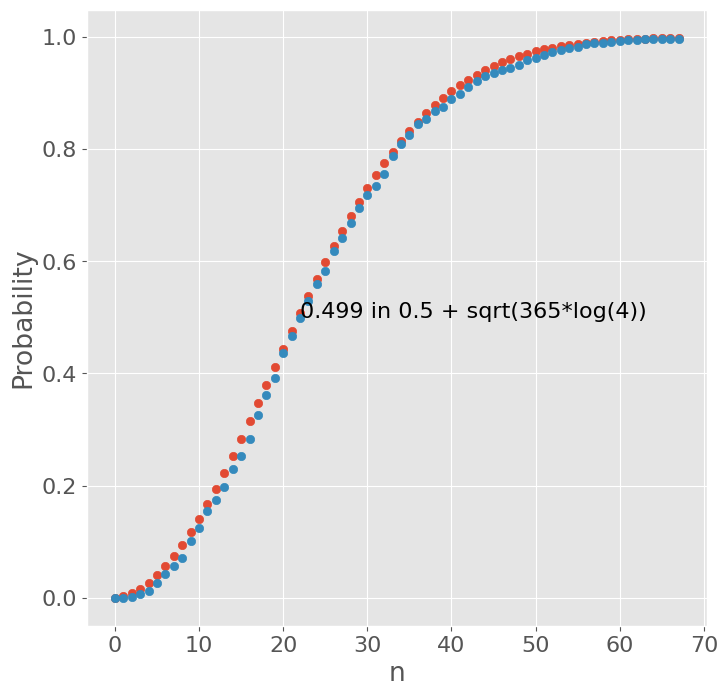

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', size=16)

def plot_prob(n, year):
    # output the observed probability of "same birthday" as a function
    # of the total number of people
    ys = birthday(n, year)
    xs = range(len(ys))

    # theoretical prediction
    t_ys = theory(year, len(ys))

    # additional info
    pred = int(0.5 + sqrt(year * log(4)))
    prob = ys[pred]
    msg = str(prob) + ' in 0.5 + sqrt({0}*log(4))'.format(year)

    plt.figure(figsize=(8, 8))
    plt.scatter(xs, t_ys)
    plt.scatter(xs, ys)
    
    plt.annotate(msg, xy=(pred, ys[pred]))
    plt.xlabel('n')
    plt.ylabel('Probability')

plot_prob(1000, 365)